In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
from numpy.random import multinomial

def sample_series(series, n=1000):
    return multinomial(series.sum(), series/series.sum(), n)

In [22]:
from lint_analysis.bin_counts.models import BinCount

def plot_series(token, w=8, h=8):
    
    series = BinCount.token_series(token)
    
    plt.figure(figsize=(w, h))
    plt.plot(series)
    
    plt.title('"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

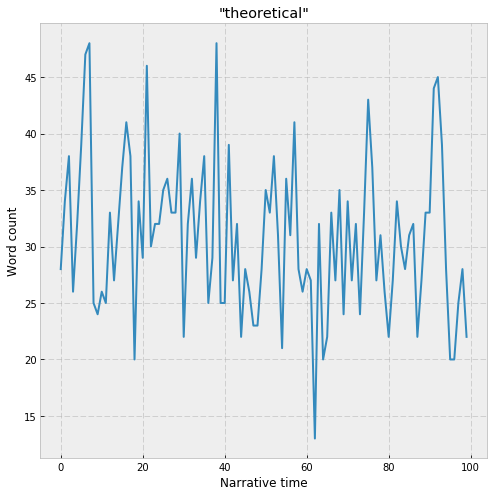

In [23]:
plot_series('theoretical')

In [24]:
def plot_series_expected(token, w=8, h=8):
    
    series = BinCount.token_series(token)
    
    expected = series.sum() / len(series)
    
    plt.figure(figsize=(w, h))
    
    plt.axhline(expected, color='black')
    plt.plot(series)
    
    plt.title('"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

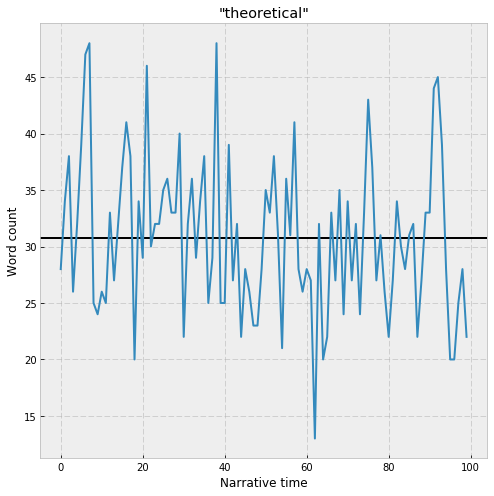

In [25]:
plot_series_expected('theoretical')

In [34]:
import numpy as np

def plot_sample(token, w=8, h=8):
    
    series = BinCount.token_series(token)
    
    expected = series.sum() / len(series)

    bs = sample_series(np.full(len(series), expected))
    
    plt.figure(figsize=(w, h))
    
    plt.axhline(expected, color='black')
    plt.plot(bs[0])
    
    plt.title('"{}", random permutation'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

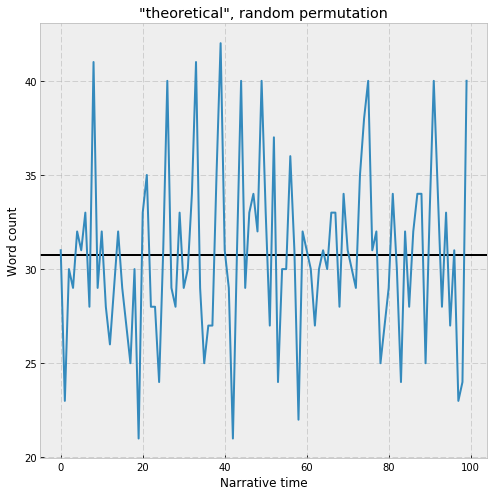

In [35]:
plot_sample('theoretical')

In [28]:
import numpy as np

from lint_analysis.bin_counts.models import BinCount

def plot_sampled_series(token, w=8, h=8):
    
    series = BinCount.token_series(token)
    
    expected = series.sum() / len(series)
    samples = sample_series(np.full(len(series), expected))
    
    avg_std = samples.std(1).mean()

    plt.figure(figsize=(w,h))
    
    plt.plot([0, 100], [expected, expected], c='orange', lw=0.5)

    plt.fill_between(
        range(101),
        expected + 2*avg_std,
        expected - 2*avg_std,
        color='black',
        alpha=0.1,
    )
    
    print(token)
    
    plt.title(token)
    plt.xlabel('Narrative time')
    plt.xlabel('Word count')
    plt.plot(series)
    plt.show()

theoretical


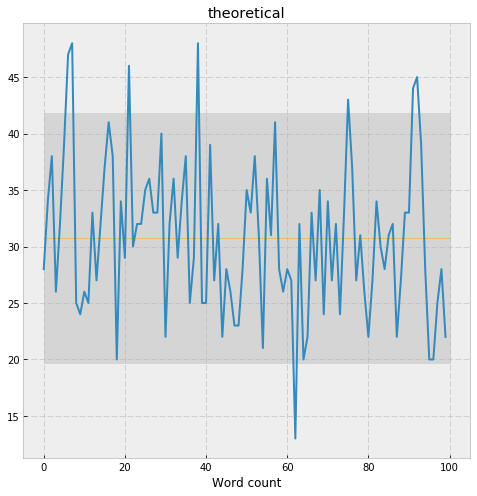

In [29]:
plot_sampled_series('theoretical')

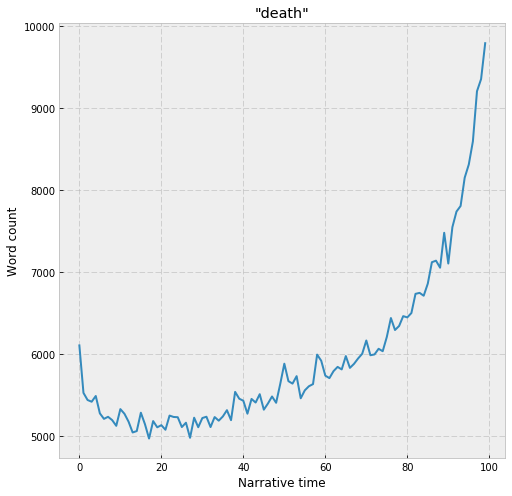

In [30]:
plot_series('death')